In [59]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import numpy as np
from matplotlib import pyplot as plt

In [60]:
#Loading the dataset
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [61]:
x_train.shape

(50000, 32, 32, 3)

In [62]:
x_test.shape

(10000, 32, 32, 3)

In [63]:
y_test.shape

(10000, 1)

In [44]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [45]:
print(y_train.shape)
y_train[:5]

(50000, 1)


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

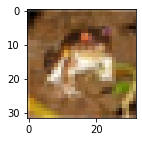

In [46]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])

In [47]:
class_labels=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [64]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

y_test.shape

(10000,)

In [49]:
def plot_sample(x,y):
    
     plt.figure(figsize=(2,2))
     plt.imshow(x)
     plt.xlabel(class_labels[y])

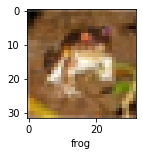

In [50]:
plot_sample(x_train[0],y_train[0])

In [51]:
#Normalize the data
x_train=x_train/255
x_test=y_train/255

In [82]:
#Creating CNN model
model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
     
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    ])
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 1.9275 - accuracy: 0.3369
Epoch 2/10
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.3533 - accuracy: 0.5159
Epoch 3/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.1617 - accuracy: 0.5900s - loss: 1.1
Epoch 4/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.0646 - accuracy: 0.6299
Epoch 5/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.9886 - accuracy: 0.6583
Epoch 6/10
50000/50000 [==============================] - 47s 946us/sample - loss: 0.9348 - accuracy: 0.6764
Epoch 7/10
50000/50000 [==============================] - 48s 964us/sample - loss: 0.8862 - accuracy: 0.6956
Epoch 8/10
50000/50000 [==============================] - 47s 941us/sample - loss: 0.8458 - accuracy: 0.7084
Epoch 9/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.8062 - accuracy: 0

The model gives accuracy of 0.7321 and loss=0.7752 for 10 epochs

In [83]:
#Testing accuracy on testing data
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 8s 799us/sample - loss: 1.0821 - accuracy: 0.6601


[1.082118835067749, 0.6601]

Accuracy=0.6601 for testing data

In [84]:
y_predicted=model.predict(x_test)

In [85]:
y_predicted[:5]

array([[1.1018592e-02, 1.2361522e-02, 9.3346024e-03, 7.4725017e-02,
        2.6995346e-03, 1.0697291e-02, 6.1224531e-03, 1.2553962e-03,
        8.1086749e-01, 6.0918178e-02],
       [3.0843984e-02, 1.0703387e-01, 1.2548524e-04, 1.9858216e-04,
        2.0104479e-05, 5.2225732e-07, 1.1625620e-05, 3.7729869e-06,
        8.4409904e-01, 1.7662972e-02],
       [1.3183530e-01, 6.7628115e-02, 6.9634102e-02, 2.9947396e-02,
        1.7462565e-02, 2.9124473e-03, 8.6574582e-04, 5.7779150e-03,
        5.5022734e-01, 1.2370898e-01],
       [8.8072914e-01, 2.5479808e-02, 2.2825254e-02, 6.0769951e-04,
        7.9310301e-04, 2.3006072e-04, 2.8696659e-04, 2.2727161e-04,
        1.2778410e-02, 5.6042351e-02],
       [9.3320625e-07, 5.8571851e-07, 1.4016401e-03, 1.9731359e-03,
        6.6345423e-01, 4.0746103e-03, 3.2906446e-01, 1.4332939e-05,
        2.5587424e-06, 1.3539647e-05]], dtype=float32)

In [86]:
y_predicted_class=[np.argmax(i) for i in y_predicted]

In [87]:
y_predicted_class[:5]

[8, 8, 8, 0, 4]

In [88]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

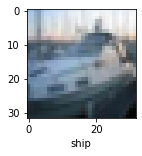

In [89]:
plot_sample(x_test[2],y_test[2])

In [90]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_17 (Dense)             (None, 10)               